## Import

In [1]:
import pandas as pd
import json
import os
import pandas as pd
import pyarrow.parquet as pq

#### Graph

from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
from geopy.geocoders import Nominatim
import seaborn as sns
import squarify
import matplotlib.patches as mpatches
from pywaffle import Waffle
import plotly.graph_objects as go

import statsmodels.api as sm

## Conversion csv to parquet

afin de manier des fichiers + légers et opti , conversion en format parquet

### Tout le dossier

'''



# Spécifiez le chemin absolu vers le répertoire du script
script_directory = r"C:\Users\SKONIECZNY\Desktop\Cars_Analysis\occasions_cars\le_parking\script"

# Construisez le chemin absolu du dossier "data" en fonction du dossier "script"
data_directory = os.path.join(script_directory, '..', 'data')

# Parcourez les fichiers dans le dossier "data"
for filename in os.listdir(data_directory):
    # Vérifiez si le fichier a l'extension .csv
    if filename.endswith(".csv"):
        # Construisez le chemin absolu du fichier CSV
        csv_file_path = os.path.join(data_directory, filename)

        # Construisez le chemin absolu du fichier Parquet en remplaçant l'extension
        parquet_file_path = os.path.join(data_directory, os.path.splitext(filename)[0] + '.parquet')

        # Vérifiez si le fichier Parquet existe déjà, dans ce cas, ne rien faire
        if os.path.exists(parquet_file_path):
            print(f"Le fichier {filename} a déjà été converti en {os.path.basename(parquet_file_path)}")
            continue

        try:
            # Chargez le fichier CSV en utilisant Pandas avec gestion d'erreur pour les lignes problématiques
            df = pd.read_csv(csv_file_path, error_bad_lines=False, encoding='utf-8')
        except pd.errors.ParserError as e:
            print(f"Erreur lors de la lecture du fichier {filename}: {e}")
            continue
        except UnicodeDecodeError as e:
            print(f"Erreur de décodage lors de la lecture du fichier {filename}: {e}")
            continue

        # Écrivez le DataFrame dans un fichier Parquet
        df.to_parquet(parquet_file_path)

        print(f"Le fichier {filename} a été converti en {os.path.basename(parquet_file_path)}")
'''

## Création dun csv réunissant tout les autres Csv ( merged)

In [2]:
# Spécifiez le chemin absolu vers le répertoire du script
script_directory = r"/Users/armaaand/Downloads/Cars_Analysis-main/occasions_cars/le_parking/script"

# Construisez le chemin absolu du dossier "data" en fonction du dossier "script"
data_directory = os.path.join(script_directory, '..', 'data')

# Initialisez une liste pour stocker les DataFrames de chaque fichier CSV
dfs = []

# Chemin absolu du fichier .parquet
parquet_file_path = r"/Users/armaaand/Downloads/Cars_Analysis-main/occasions_cars/le_parking/data/leparking.parquet"

# Charger le fichier .parquet en utilisant pyarrow
parquet_table = pq.read_table(parquet_file_path)

# Convertir la table parquet en DataFrame pandas
parquet_df = parquet_table.to_pandas()

# Ajouter le DataFrame du fichier .parquet à la liste
dfs.append(parquet_df)

# Parcourez les fichiers dans le dossier "data"
for filename in os.listdir(data_directory):
    # Vérifiez si le fichier a l'extension .csv
    if filename.endswith(".csv"):
        # Construisez le chemin absolu du fichier CSV
        csv_file_path = os.path.join(data_directory, filename)

        try:
            # Chargez le fichier CSV en utilisant Pandas
            df = pd.read_csv(csv_file_path, encoding='utf-8')

            # Ajoutez le DataFrame à la liste
            dfs.append(df)

        except pd.errors.ParserError as e:
            print(f"Erreur lors de la lecture du fichier {filename}: {e}")
        except UnicodeDecodeError as e:
            print(f"Erreur de décodage lors de la lecture du fichier {filename}: {e}")

# Fusionnez tous les DataFrames de la liste en un seul DataFrame
df = pd.concat(dfs, ignore_index=True)

# Affichez les premières lignes du DataFrame fusionné
print(df.head())

# Vous pouvez également écrire le DataFrame fusionné dans un fichier CSV si nécessaire
df.to_csv(os.path.join(data_directory, 'merged_data.csv'), index=False)

/var/folders/jm/vvjxp6h975z62bqbnn5lsbj00000gn/T/ipykernel_32646/601970798.py:31: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file_path, encoding='utf-8')


          Modele      Marque        Date    Location      Prix Carburant  \
0             C7    Corvette  16.05.2022  ETATS-UNIS  99 990 €      None   
1        Equinox   Chevrolet  24.11.2023      CANADA   2 727 €      None   
2       Ram 2500  Ram trucks  27.11.2023      CANADA  23 111 €      None   
3  Grand caravan       Dodge  10.11.2023      CANADA  23 179 €      None   
4         Tacoma      Toyota  28.11.2023      CANADA  35 382 €      None   

  Kilométrage Année Boîte de vitesse Departements  
0           0     0             None         None  
1           0     0             None         None  
2           0     0             None         None  
3           0     0             None         None  
4           0     0             None         None  


# Traitement de la donnée

## Suppression des doublons

On a pu précedement visualiser les données , on va dabord supprimer tout les doublons afin de travailler sur nos valeurs réelles
Les doublons sont les premiers problèmes que l'on peut rencontrer dans nos données

In [3]:
# suppresion des duplicatas 
df = df.drop_duplicates()
 
df.reset_index(drop=True, inplace=True)


print(df)

               Modele      Marque         Date    Location      Prix  \
0                  C7    Corvette   16.05.2022  ETATS-UNIS  99 990 €   
1             Equinox   Chevrolet   24.11.2023      CANADA   2 727 €   
2            Ram 2500  Ram trucks   27.11.2023      CANADA  23 111 €   
3       Grand caravan       Dodge   10.11.2023      CANADA  23 179 €   
4              Tacoma      Toyota   28.11.2023      CANADA  35 382 €   
...               ...         ...          ...         ...       ...   
158644             A3        Audi   02.01.2024     POLOGNE   5 775 €   
158645          Focus        Ford   11.11.2023     POLOGNE   1 490 €   
158646              6       Mazda   29.11.2023     POLOGNE   4 366 €   
158647         Rx 300       Lexus   24.10.2023     POLOGNE   8 062 €   
158648          Civic       Honda   01.12.2023     POLOGNE   7 530 €   

       Carburant Kilométrage Année Boîte de vitesse Departements  
0           None           0     0             None         None  
1

#### Observation :

Nous avions plus d'1 million de doublons

## Analyse des valeurs uniques

Nous procèdons ensuite à  la vérification de chaque valeur unique de notre dataset .
Cela nous permettra de relever les problèmes de justesse de valeurs .
Les problèmes peuvent être : 
    - Nan > remplir autre valeurs ou supprimer la colonne
    - erreur lexical > mauvaises données dans la colonne (exemple int)

    - Irrégularité de format : ( exemple cm et m dans la meme colonne)

    - Formatage : type de donnée dans la colonne >

        exemple on attend une liste de valeurs , on traite une liste de liste ou on attend le format

        dd-mm-yyyy mais on a un string

    

    - Outlier ( valeurs excessive hors moyenne)

### Visualisation des valeurs uniques

In [4]:
unique_prices = df['Prix'].unique()
print(unique_prices)

['99 990 €' '2 727 €' '23 111 €' ... '26 079 €' '19 380 €' '543 €']


### Observation
Aucune autres  différentes devises présentes 

#### Observation

Nous pouvons ainsi mieux identifer les  valeurs , types dans lesquels nous allons les convertir .
On peut alors organiser nos futures applications

### Traitement des colonnes ( valeurs et types)

In [5]:

# Pour la date =  Conversion de la colonne 'Date' dans un format de date 
df['Date'] = pd.to_datetime(df['Date'].str.strip(), format='%d.%m.%Y')



#  pour la colonne prix  = Nettoyage de la colonne 'Prix' en supprimant le symbole '€', la virgule, et les espaces + Conversion dans le type
df['Prix'] = pd.to_numeric(df['Prix'].str.strip().replace('[^\d.]', '', regex=True))

# pour le kilometrage = Nettoyage de la colonne 'Kilométrage' en supprimant 'KM', les espaces, la virgule, et convertir en numérique + Conversion
df['Kilométrage'] = pd.to_numeric(df['Kilométrage'].str.strip().replace('[^\d.]', '', regex=True))

#  pour le carburant = Nettoyage de la colonne 'Carburant' en mettant en majuscules et en remplaçant valeur null  par NaN
df['Carburant'] = df['Carburant'].str.upper().replace('-', pd.NA)

df['Carburant'] = df['Carburant'].str.upper()
df['Carburant'] = df['Carburant'].mask(df['Carburant'] == '-', pd.NA)
df['Carburant'] = df['Carburant'].mask(df['Carburant'] == '', pd.NA)

#  pour boite de vitesse = Nettoyage de la colonne 'Boîte de vitesse' en mettant en majuscules et en remplaçant Null  par NaN
df['Boîte de vitesse'] = df['Boîte de vitesse'].str.upper().replace('-', pd.NA)

df['Boîte de vitesse'] = df['Boîte de vitesse'].str.upper().mask(df['Boîte de vitesse'] == '-', pd.NA)

# conversion année en integer
df['Année'] = pd.to_numeric(df['Année'], errors='coerce')





# Affichage du DataFrame après la conversion
print(df)

<>:7: SyntaxWarning: invalid escape sequence '\d'
<>:10: SyntaxWarning: invalid escape sequence '\d'
<>:7: SyntaxWarning: invalid escape sequence '\d'
<>:10: SyntaxWarning: invalid escape sequence '\d'
/var/folders/jm/vvjxp6h975z62bqbnn5lsbj00000gn/T/ipykernel_32646/1875123811.py:7: SyntaxWarning: invalid escape sequence '\d'
  df['Prix'] = pd.to_numeric(df['Prix'].str.strip().replace('[^\d.]', '', regex=True))
/var/folders/jm/vvjxp6h975z62bqbnn5lsbj00000gn/T/ipykernel_32646/1875123811.py:10: SyntaxWarning: invalid escape sequence '\d'
  df['Kilométrage'] = pd.to_numeric(df['Kilométrage'].str.strip().replace('[^\d.]', '', regex=True))


               Modele      Marque       Date    Location     Prix Carburant  \
0                  C7    Corvette 2022-05-16  ETATS-UNIS  99990.0      None   
1             Equinox   Chevrolet 2023-11-24      CANADA   2727.0      None   
2            Ram 2500  Ram trucks 2023-11-27      CANADA  23111.0      None   
3       Grand caravan       Dodge 2023-11-10      CANADA  23179.0      None   
4              Tacoma      Toyota 2023-11-28      CANADA  35382.0      None   
...               ...         ...        ...         ...      ...       ...   
158644             A3        Audi 2024-01-02     POLOGNE   5775.0   ESSENCE   
158645          Focus        Ford 2023-11-11     POLOGNE   1490.0    DIESEL   
158646              6       Mazda 2023-11-29     POLOGNE   4366.0    DIESEL   
158647         Rx 300       Lexus 2023-10-24     POLOGNE   8062.0       GPL   
158648          Civic       Honda 2023-12-01     POLOGNE   7530.0   ESSENCE   

        Kilométrage   Année Boîte de vitesse Depart

In [6]:
# Prep de la colonne Location
# Transformation de Location en majuscules afin d'uniformiser la casse
df['Location'] = df['Location'].str.upper()
# Supprimer les espaces de la colonne 'Location'
df['Location'] = df['Location'].str.replace(r'\s', '')




# Ajout de la colonne 'Continent' basée sur la liste des pays
continent_mapping = {
    ' AMERIQUE': ['ETATS-UNIS', 'CANADA', 'COLOMBIE', 'ARGENTINE', 'MEXIQUE', 'BRESIL', 'CHILI', 'PEROU'],
    ' ASIE': ['CHINE', 'JAPON', 'COREEDUSUD', 'INDE', 'MALAISIE', 'SINGAPOUR', 'KOWEÏT', 'CAMEROUN', 'BAHREÏN', 'QATAR', 'COREE DU SUD', 'OMAN'],
    ' EUROPE': ['POLOGNE', 'BULGARIE', 'ITALIE', 'FRANCE', 'RÉPUBLIQUETCHÈQUE', 'SERBIE', 'ESPAGNE', 'PAYS-BAS', 'ALLEMAGNE', 'SUISSE', 'AUTRICHE', 'PORTUGAL', 'GRÈCE', 'RUSSIE', 'ROYAUME-UNI', 'RÉPUBLIQUE TCHÈQUE', 'IRLANDE', 'ESTONIE', 'HONGRIE', 'LETTONIE', 'LITUANIE', 'NORVÈGE', 'CROATIE', 'DANEMARK', 'ROUMANIE', 'SUÈDE', 'LIMBOURG', 'FLANDRE-OCCIDENTALE', 'LUXEMBOURG', 'ANDORRE', 'MONACO', 'JERSEY', 'SAINT-MARIN', 'BOSNIE-HERZÉGOVINE', 'GIBRALTAR', 'ALBANIE', 'RÉPUBLIQUE DE MACÉDOINE', 'MOLDAVIE', 'ISLANDE', 'GEORGIE', 'LIECHTENSTEIN', 'MALTE','RÉPUBLIQUEDEMACÉDOINE', 'HAINAUT', 'NAMUR', 'ANVERS', 'CHYPRE'],

    ' AUSTRALIE': ['AUSTRALIE', 'NOUVELLE-ZÉLANDE', 'MAURICE'],
    ' AFRIQUE': ['AFRIQUE DU SUD', 'MAROC', 'KENYA', 'SENEGAL', "COTE D'IVOIRE", 'AFRIQUEDUSUD', 'EMIRATSARABESUNIS', "COTED'IVOIRE"]
}



# Fonction pour mapper le continent en fonction de la localisation
def map_continent(location):
    for continent, countries in continent_mapping.items():
        if location in countries:
            return continent
    return None

# Ajout de la colonne 'Continent'
df['Continent'] = df['Location'].apply(map_continent)


df




,Modele,Marque,Date,Location,Prix,Carburant,Kilométrage,Année,Boîte de vitesse,Departements,Continent
0,C7,Corvette,2022-05-16,ETATS-UNIS,99990.0,None,0.0,0.0,None,None,AMERIQUE
1,Equinox,Chevrolet,2023-11-24,CANADA,2727.0,None,0.0,0.0,None,None,AMERIQUE
2,Ram 2500,Ram trucks,2023-11-27,CANADA,23111.0,None,0.0,0.0,None,None,AMERIQUE
3,Grand caravan,Dodge,2023-11-10,CANADA,23179.0,None,0.0,0.0,None,None,AMERIQUE
4,Tacoma,Toyota,2023-11-28,CANADA,35382.0,None,0.0,0.0,None,None,AMERIQUE
...,...,...,...,...,...,...,...,...,...,...,...
158644,A3,Audi,2024-01-02,POLOGNE,5775.0,ESSENCE,234785.0,2008.0,MANUELLE,16-300,None
158645,Focus,Ford,2023-11-11,POLOGNE,1490.0,DIESEL,294000.0,2007.0,MANUELLE,16-100,None
158646,6,Mazda,2023-11-29,POLOGNE,4366.0,DIESEL,250000.0,2009.0,MANUELLE,16-100,None
158647,Rx 300,Lexus,2023-10-24,POLOGNE,8062.0,GPL,249000.0,2005.0,AUTOMATIQUE,19-400,None


### Verif  continent et modèles

In [7]:
# Identifier les valeurs uniques de 'Location' non mappées
unmapped_locations = df[df['Continent'].isnull()]['Location'].unique()

# Affichage des valeurs
print(unmapped_locations)


['EMIRATS ARABES UNIS' ' SUÈDE' ' ALLEMAGNE' ' HAINAUT' ' FRANCE' ' MAROC'
 ' ITALIE' ' PAYS-BAS' ' AUTRICHE' ' ESPAGNE' ' NAMUR' ' LUXEMBOURG'
 ' MONACO' ' SUISSE' ' AFRIQUE DU SUD' ' ANVERS' ' ARGENTINE' ' AUSTRALIE'
 ' PORTUGAL' ' BRESIL' ' BULGARIE' ' CANADA' ' GRÈCE'
 ' RÉPUBLIQUE TCHÈQUE' ' CHILI' ' CHYPRE' ' POLOGNE' ' ETATS-UNIS'
 ' IRLANDE' ' KENYA' ' LETTONIE' ' LIECHTENSTEIN' ' LITUANIE' ' MALTE'
 ' JAPON' ' MEXIQUE' ' NORVÈGE' ' ANDORRE' ' PEROU' ' INDE' ' LIMBOURG'
 ' EMIRATS ARABES UNIS' ' ESTONIE' ' FLANDRE-OCCIDENTALE' ' CHINE'
 ' MALAISIE' ' SINGAPOUR' ' COLOMBIE' " COTE D'IVOIRE"]


In [8]:
# Afficher toutes les valeurs uniques de la colonne 'Modele'
unique_modeles = df['Modele'].unique()
print("Valeurs uniques de la colonne 'Modele':")
print(unique_modeles)

# Afficher toutes les valeurs uniques de la colonne 'Marque'
unique_marques = df['Marque'].unique()
print("\nValeurs uniques de la colonne 'Marque':")
print(unique_marques)

Valeurs uniques de la colonne 'Modele':
['C7' 'Equinox' 'Ram 2500' ... 'Ls 460V8 4.6LUXURYAWD' 'Xg'
 'Rx 3002.0F SPORT']

Valeurs uniques de la colonne 'Marque':
['Corvette' 'Chevrolet' 'Ram trucks' 'Dodge' 'Toyota' 'Volkswagen' 'Jeep'
 'Gmc' 'Honda' 'Mercedes' 'Audi' 'Cadillac' 'Ford' 'Nissan' 'Kia'
 'Hyundai' 'Land rover' 'Buick' 'Bmw' 'Mitsubishi' 'Mazda' 'Subaru' 'Mini'
 'Acura' 'Tesla' 'Infiniti' 'Scion' 'Triumph' 'Jaguar' 'Lincoln' 'Mercury'
 'Suzuki' 'Pontiac' 'Porsche' 'Lexus' 'Chrysler' 'Saturn' 'Volvo'
 'Daihatsu' 'Smart' 'Byd' 'Peugeot' 'Mg' 'Seat' 'Citroen' 'Renault'
 'Daewoo' 'Chery' 'Dfsk' 'Geely' 'Jac' 'Skoda' 'Opel' 'Uaz' 'Changan'
 'Fiat' 'Ssangyong' 'Great wall motors' 'Brilliance' 'Troller'
 'Alfa romeo' 'Gurgel' 'Asia motors' 'Lifan' 'Willys' 'Iveco' 'Premier'
 'Bentley' 'Cupra' 'Maserati' 'Hummer' 'Ferrari' 'Aston martin' 'Abarth'
 'Oldsmobile' 'International harvester' 'Isuzu' 'Haval' 'Baic' 'Mahindra'
 'Gac motor' 'Jmc' 'Foton' 'Exeed' 'Maxus' 'Aro' 'Faw' 'Haima'

### Vérification des types de values des colonnes)

In [9]:
# vérif en 2.2
print(df.dtypes)


Modele                      object
Marque                      object
Date                datetime64[ns]
Location                    object
Prix                       float64
Carburant                   object
Kilométrage                float64
Année                      float64
Boîte de vitesse            object
Departements                object
Continent                   object
dtype: object


#### Observation

Tout les types sont cohérent avec les valeurs

### Vérification des valeurs Nan dans le tableau

In [10]:
# Vérification des valeurs manquantes dans le DataFrame
missing_values = df.isna().sum()

# Affichage du nombre de valeurs manquantes par colonne
print("Nombre de valeurs manquantes par colonne :")
print(missing_values)


Nombre de valeurs manquantes par colonne :
Modele                   1
Marque                   1
Date                     0
Location                 0
Prix                  6321
Carburant            10252
Kilométrage           8477
Année                 1479
Boîte de vitesse     13296
Departements          1043
Continent           104525
dtype: int64


#### Observation

Le point important pour répondre à notre problématique est le prix , cela sera la seule colonne embêtante .
Néanmoins, si nous parvenons à entrainer un modèle . Nous pourrons déterminer leurs prix 
Pour les autres missings values, nous ne les prendrons pas en compte car nous risquerons de perdre certains echantillons de données qui nous peuvent être importante . 
On conservera toutes les valeurs , mais prendrons encore plus de précaution lors de nos analyses- modèles.

###  Analyse des Valeurs Numériques ( abberantes)

Il se peut que certaines valeurs paraîtront trop faible ou trop haute. 
On vérifie cela ( les prix auront une grande étendue, mais il se peut quil y est des outliers )

In [11]:
df.describe()

,Date,Prix,Kilométrage,Année
count,158649,1.523280e+05,150172.000000,157170.000000
mean,2023-02-22 12:55:25.045856,2.611651e+04,96417.607637,2000.804441
min,2019-01-15 00:00:00,1.000000e+02,0.000000,0.000000
25%,2022-05-21 00:00:00,7.511000e+03,19446.750000,2010.000000
50%,2023-05-03 00:00:00,1.608200e+04,75000.000000,2016.000000
75%,2023-11-01 00:00:00,2.998000e+04,149000.000000,2021.000000
max,2024-01-06 00:00:00,9.800000e+06,900000.000000,2024.000000
std,NaN,6.666177e+04,92589.696492,163.794312


les valeurs de kilommétragé et Année = 0 vont nous déranger par la suite de nos représentations : on les drop

In [12]:
# Supprimer les lignes où Kilométrage ou Année est égal à 0
df = df[(df['Kilométrage'] != 0) & (df['Année'] != 0)]
df

,Modele,Marque,Date,Location,Prix,Carburant,Kilométrage,Année,Boîte de vitesse,Departements,Continent
26,C7,Corvette,2022-05-16,ETATS-UNIS,99990.0,ESSENCE,16837.0,2015.0,AUTOMATIQUE,-,AMERIQUE
27,Equinox,Chevrolet,2023-11-24,CANADA,2727.0,<NA>,213000.0,2013.0,<NA>,A1K,AMERIQUE
28,Ram 2500,Ram trucks,2023-11-27,CANADA,23111.0,<NA>,180000.0,2013.0,<NA>,A1K,AMERIQUE
29,Grand caravan,Dodge,2023-11-10,CANADA,23179.0,<NA>,38700.0,2017.0,<NA>,A1A,AMERIQUE
30,Tacoma,Toyota,2023-11-28,CANADA,35382.0,<NA>,39000.0,2021.0,<NA>,A1A,AMERIQUE
...,...,...,...,...,...,...,...,...,...,...,...
158644,A3,Audi,2024-01-02,POLOGNE,5775.0,ESSENCE,234785.0,2008.0,MANUELLE,16-300,None
158645,Focus,Ford,2023-11-11,POLOGNE,1490.0,DIESEL,294000.0,2007.0,MANUELLE,16-100,None
158646,6,Mazda,2023-11-29,POLOGNE,4366.0,DIESEL,250000.0,2009.0,MANUELLE,16-100,None
158647,Rx 300,Lexus,2023-10-24,POLOGNE,8062.0,GPL,249000.0,2005.0,AUTOMATIQUE,19-400,None


In [13]:
df.describe()

,Date,Prix,Kilométrage,Année
count,157606,1.513450e+05,149129.000000,156127.000000
mean,2023-02-23 08:50:25.894953472,2.614096e+04,97091.947066,2014.170733
min,2019-01-15 00:00:00,1.000000e+02,10.000000,1913.000000
25%,2022-05-21 00:00:00,7.521000e+03,20400.000000,2010.000000
50%,2023-05-03 00:00:00,1.608400e+04,75378.000000,2016.000000
75%,2023-11-01 00:00:00,2.998000e+04,150000.000000,2021.000000
max,2024-01-06 00:00:00,9.800000e+06,900000.000000,2024.000000
std,NaN,6.683657e+04,92559.910246,9.254123


### Gestion des outliers 

In [14]:




# Supprimer les outliers basés sur l'écart interquartile (IQR)
def remove_outliers_iqr(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1

    # Définir les limites pour détecter les outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filtrer les données pour exclure les outliers
    dataframe = dataframe[(dataframe[column] >= lower_bound) & (dataframe[column] <= upper_bound)]
    
    return dataframe

# Supprimer les outliers pour la colonne "Prix"
df = remove_outliers_iqr(df, 'Prix')

# Supprimer les outliers pour la colonne "Kilométrage"
df = remove_outliers_iqr(df, 'Kilométrage')

# Supprimer les outliers pour la colonne "Année"
df = remove_outliers_iqr(df, 'Année')



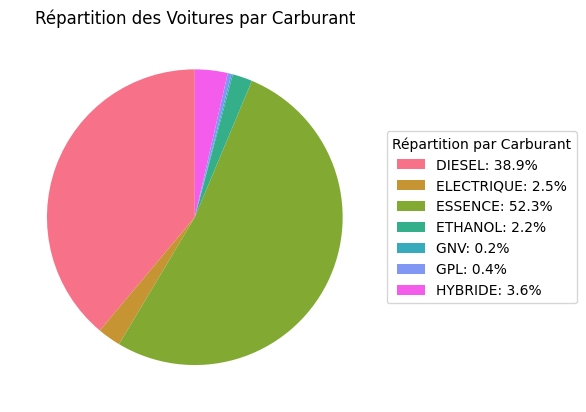

In [15]:
# Groupez par carburant + nombre total de voitures
total_cars_by_carburant = df.groupby('Carburant').size()

names = total_cars_by_carburant.index
size = total_cars_by_carburant.values

fig, ax = plt.subplots()
fig.patch.set_facecolor('white')

colors = sns.color_palette("husl", len(names))

# Créez le diagramme en camembert
wedges, texts, autotexts = plt.pie(size, startangle=90, autopct='', colors=colors)

# Créez une légende personnalisée avec les noms et les pourcentages
legend_labels = [f'{name}: {size[i] / sum(size) * 100:.1f}%' for i, name in enumerate(names)]
ax.legend(legend_labels, title='Répartition par Carburant', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))

plt.title('Répartition des Voitures par Carburant')

# Affichez le diagramme
plt.show()

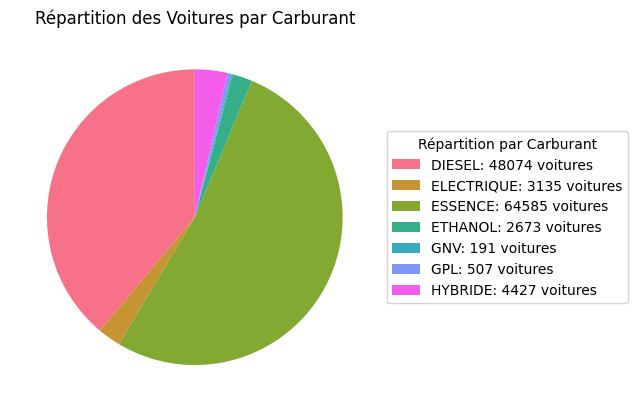

In [17]:
# Groupez par carburant + nombre total de voitures
total_cars_by_carburant = df.groupby('Carburant').size()

names = total_cars_by_carburant.index
size = total_cars_by_carburant.values

fig, ax = plt.subplots()
fig.patch.set_facecolor('white')

colors = sns.color_palette("husl", len(names))

# Créez le diagramme en camembert
wedges, texts, autotexts = plt.pie(size, startangle=90, autopct='', colors=colors)

# Créez une légende personnalisée avec les noms et les pourcentages
legend_labels = [f'{name}: {size[i]} voitures' for i, name in enumerate(names)]
ax.legend(legend_labels, title='Répartition par Carburant', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))

plt.title('Répartition des Voitures par Carburant')

# Affichez le diagramme
plt.show()
